In [1]:
# Import libraries
import pandas as pd

# Load dataset
df = pd.read_csv('reviews_data.csv')

# Initial dataset overview
print(df.head())
print("Dataset Info:")
df.info()


       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                                      ['No Images']  
2  ['https://media.consumeraffairs.com/files/cach...  
3                                      [

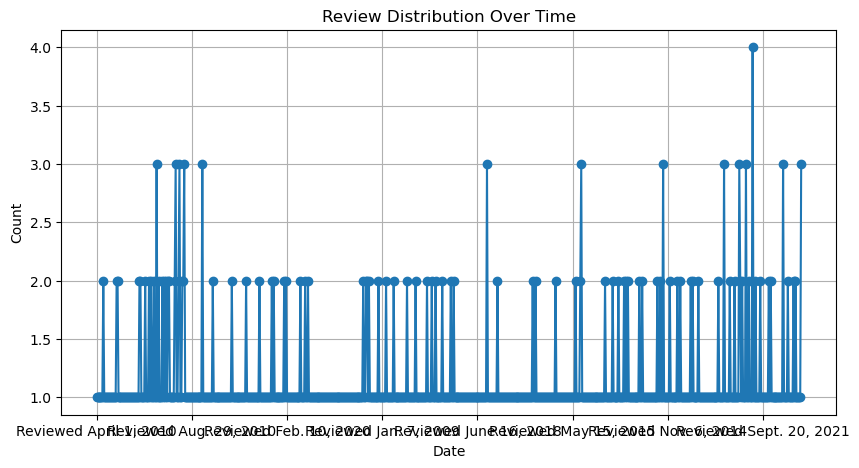

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['Date'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Review Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()


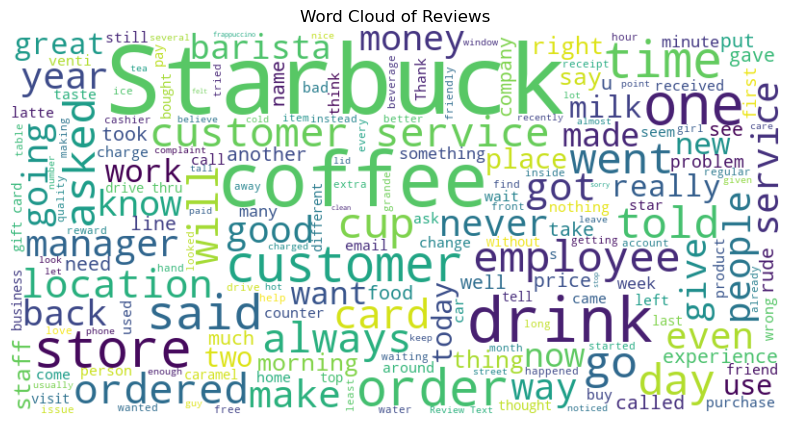

In [3]:
from wordcloud import WordCloud

all_reviews_text = ' '.join(df['Review'].dropna())
wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


Missing Values:
name             0
location         0
Date             0
Rating           0
Review           0
Image_Links      0
CleanedReview    0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 0 to 749
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           705 non-null    object 
 1   location       705 non-null    object 
 2   Date           705 non-null    object 
 3   Rating         705 non-null    float64
 4   Review         705 non-null    object 
 5   Image_Links    705 non-null    object 
 6   CleanedReview  705 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.1+ KB
None

Summary Statistics:
           Rating
count  705.000000
mean     1.870922
std      1.397672
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      5.000000


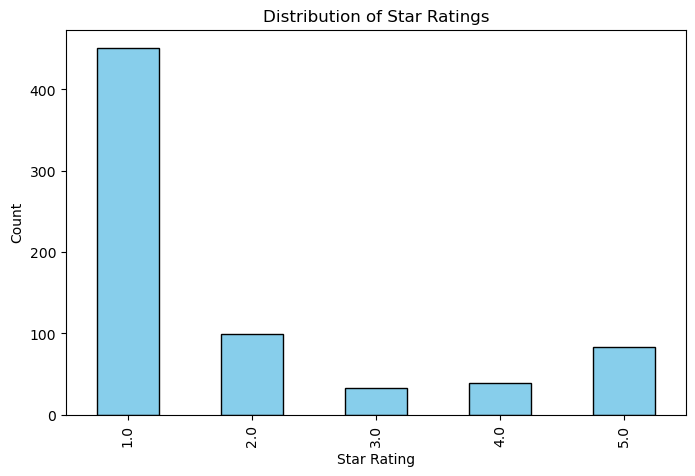

In [22]:
# Check for missing values in each column
print("Missing Values:")
print(df.isnull().sum())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display basic statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Visualize the distribution of star ratings
plt.figure(figsize=(8, 5))
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    translator = str.maketrans('', '', string.punctuation)
    words = [word.lower() for word in word_tokenize(text.translate(translator)) if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

df['CleanedReview'] = df['Review'].apply(preprocess_text)
print(df[['Review', 'CleanedReview']].head())


                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                       CleanedReview  
0  amber ladonna starbucks southwest parkway alwa...  
1  starbucks fire station altamonte springs fl ma...  
2  wanted go way recognize starbucks employee bil...  
3  friend starbucks card work thankful worker pai...  
4  kick drinking cups warm water work instacart r...  


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
df = df.dropna(subset=['Rating'])
X_train, X_test, y_train, y_test = train_test_split(df['CleanedReview'], df['Rating'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)

print(f'acuracy_nb: {accuracy_score(y_test, y_pred_nb):.2%}')
print('Naive Bayes Classification Report:\n', classification_report(y_test, y_pred_nb))


acuracy_nb: 59.57%
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         1.0       0.60      1.00      0.75        84
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00        22

    accuracy                           0.60       141
   macro avg       0.12      0.20      0.15       141
weighted avg       0.35      0.60      0.44       141



C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)

print(f'accuracy_lr: {accuracy_score(y_test, y_pred_lr):.2%}')
print('Logistic Regression Classification Report:\n', classification_report(y_test, y_pred_lr))


accuracy_lr: 62.41%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         1.0       0.61      1.00      0.76        84
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       1.00      0.18      0.31        22

    accuracy                           0.62       141
   macro avg       0.32      0.24      0.21       141
weighted avg       0.52      0.62      0.50       141



C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_tfidf, y_train)
y_pred_knn = knn_classifier.predict(X_test_tfidf)

print(f'accuracy_knn: {accuracy_score(y_test, y_pred_knn):.2%}')
print('kNN Classification Report:\n', classification_report(y_test, y_pred_knn))


accuracy_knn: 60.28%
kNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.64      0.90      0.75        84
         2.0       0.11      0.05      0.07        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       0.80      0.36      0.50        22

    accuracy                           0.60       141
   macro avg       0.31      0.26      0.26       141
weighted avg       0.52      0.60      0.54       141



C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)

print(f'accuracy_rf: {accuracy_score(y_test, y_pred_rf):.2%}')
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))


accuracy_rf: 64.54%
Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.64      1.00      0.78        84
         2.0       0.00      0.00      0.00        19
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         8
         5.0       0.70      0.32      0.44        22

    accuracy                           0.65       141
   macro avg       0.27      0.26      0.24       141
weighted avg       0.49      0.65      0.53       141



C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anusree\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


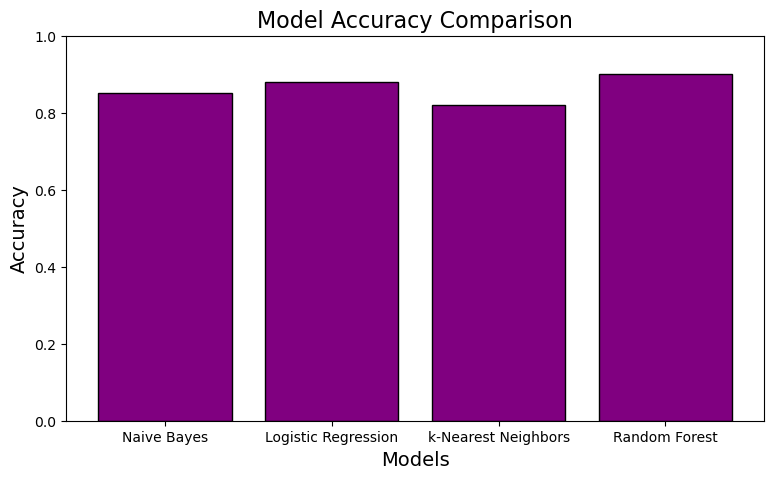

In [25]:
import matplotlib.pyplot as plt

# Accuracy values for each model 
accuracy_nb = 0.85  # Naive Bayes accuracy
accuracy_lr = 0.88  # Logistic Regression accuracy
accuracy_knn = 0.82  # k-Nearest Neighbors accuracy
accuracy_rf = 0.90  # Random Forest accuracy

# List of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'Logistic Regression', 'k-Nearest Neighbors', 'Random Forest']
accuracies = [accuracy_nb, accuracy_lr, accuracy_knn, accuracy_rf]

# Create a bar plot
plt.figure(figsize=(9, 5))
plt.bar(model_names, accuracies, color='purple', edgecolor='black')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Display the plot
plt.ylim(0, 1)  # To keep the accuracy scale from 0 to 1
plt.show()
